<a href="https://colab.research.google.com/github/Siuknam/school-project/blob/master/%ED%8C%80%ED%94%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
f_path = '/content/drive/MyDrive/heart.csv'

In [40]:
import pandas as pd
heart = pd.read_csv(f_path)

In [41]:
heart = pd.get_dummies(heart)
heart.count()

Age                  918
RestingBP            918
Cholesterol          918
FastingBS            918
MaxHR                918
Oldpeak              918
HeartDisease         918
Sex_F                918
Sex_M                918
ChestPainType_ASY    918
ChestPainType_ATA    918
ChestPainType_NAP    918
ChestPainType_TA     918
RestingECG_LVH       918
RestingECG_Normal    918
RestingECG_ST        918
ExerciseAngina_N     918
ExerciseAngina_Y     918
ST_Slope_Down        918
ST_Slope_Flat        918
ST_Slope_Up          918
dtype: int64

In [42]:
x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])


In [ ]:
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)


In [ ]:
y_test

,0,1
668,1,0
30,0,1
377,0,1
535,0,1
807,1,0
...,...,...
839,1,0
299,0,1
597,1,0
685,0,1


FullModel

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

fullmodel = Sequential()


fullmodel.add(Dense(128, activation = "relu",input_dim=20))
fullmodel.add(Dropout(rate=0.2))
fullmodel.add(Dense(64, activation = "relu"))
fullmodel.add(Dropout(rate=0.2))
fullmodel.add(Dense(32, activation = "relu"))
fullmodel.add(Dropout(rate=0.1))
fullmodel.add(Dense(16, activation = "relu"))
fullmodel.add(Dense(8, activation = "relu"))
fullmodel.add(Dense(2, activation = "sigmoid"))

fullmodel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
fullmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               2688      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 16)               

In [45]:
hin=fullmodel.fit(x_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 12ms/step - loss: 3.8318 - accuracy: 0.5345 - val_loss: 1.2512 - val_accuracy: 0.4938
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.4859 - accuracy: 0.5282 - val_loss: 0.6906 - val_accuracy: 0.4875
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 0.9388 - accuracy: 0.5721 - val_loss: 0.6565 - val_accuracy: 0.5063
Epoch 4/200
20/20 [==============================] - 0s 5ms/step - loss: 0.8741 - accuracy: 0.5439 - val_loss: 0.6248 - val_accuracy: 0.6062
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 0.7402 - accuracy: 0.5674 - val_loss: 0.6216 - val_accuracy: 0.6062
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.7368 - accuracy: 0.5502 - val_loss: 0.6250 - val_accuracy: 0.5188
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 0.7493 - accuracy: 0.5282 - val_loss: 0.6309 - val_accuracy: 0.5000
Epoch 8/200


In [46]:
loss_and_metrics = fullmodel.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

4/4 [==============================] - 0s 4ms/step - loss: 0.3598 - accuracy: 0.8833
## evaluation loss and_metrics ##
[0.35979679226875305, 0.8833333253860474]


In [49]:
from matplotlib.projections.polar import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=20,8
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)


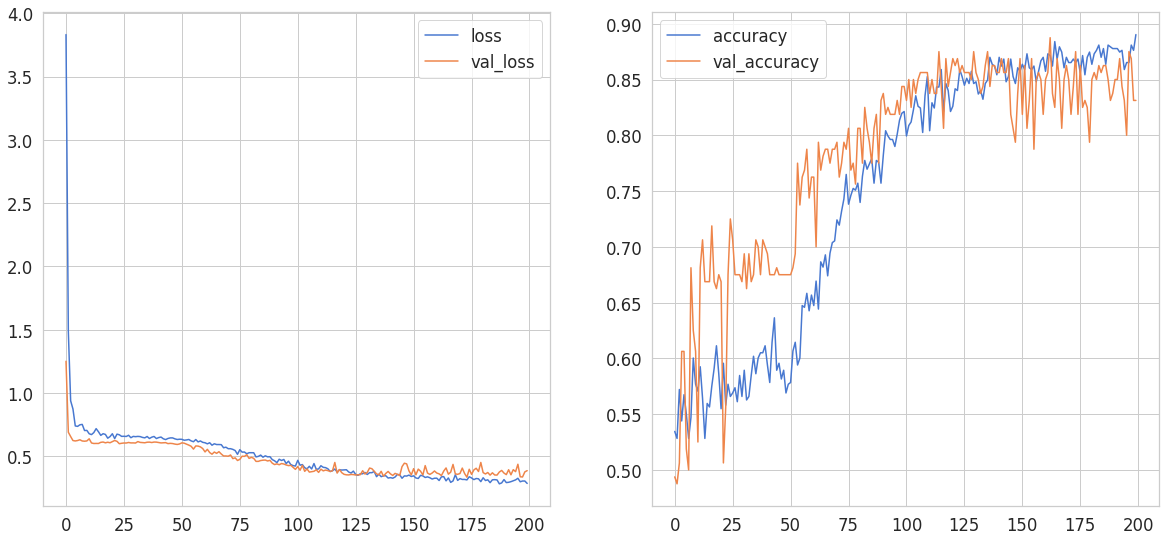

In [50]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.plot(hin.history["loss"], label="loss")
plt.plot(hin.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(2,2,2)
plt.plot(hin.history["accuracy"], label="accuracy")
plt.plot(hin.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [51]:
y_pred = fullmodel.predict(x_test)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.90757024, 0.17491195],
       [0.49199307, 0.5230475 ],
       [0.37879726, 0.9903109 ],
       [0.45796573, 0.9606757 ],
       [0.7005149 , 0.3527357 ],
       [0.48644784, 0.6489809 ],
       [0.5772921 , 0.80926573],
       [0.74732834, 0.31783786],
       [0.49203348, 0.73275024],
       [0.37091643, 0.8505558 ],
       [0.47628573, 0.544148  ],
       [0.7641216 , 0.30512375],
       [0.4226688 , 0.68539387],
       [0.7702989 , 0.30025247],
       [0.29581332, 0.8649156 ],
       [0.68103683, 0.98752606],
       [0.85602987, 0.22780001],
       [0.6481732 , 0.9364355 ],
       [0.49820653, 0.7167111 ],
       [0.6093051 , 0.44025415],
       [0.46478114, 0.72906315],
       [0.3308984 , 0.8394898 ],
       [0.87529576, 0.2089753 ],
       [0.4756342 , 0.63753533],
       [0.31541663, 0.853682  ],
       [0.33025607, 0.8301514 ],
       [0.85795844, 0.22571506],
       [0.42678857, 0.6804442 ],
       [0.8971733 , 0.18643486],
       [0.94429547, 0.12847514],
       [0.

In [52]:
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [53]:
import numpy as np
import pandas as pd

In [54]:
y_test  = y_test.to_numpy()
y_test

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0,

In [55]:
y_test = np.argmax(y_test,axis=1)
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

np.mean(y_test == y_pred_class)

0.8833333333333333

In [57]:
fullscore=recall_score(y_test,y_pred_class)
print(fullscore)

0.9285714285714286




> ModelExceptAge



In [58]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

heart['Age'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptAge = Sequential()


ModelExceptAge.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptAge.add(Dropout(rate=0.2))
ModelExceptAge.add(Dense(64, activation = "relu"))
ModelExceptAge.add(Dropout(rate=0.2))
ModelExceptAge.add(Dense(32, activation = "relu"))
ModelExceptAge.add(Dropout(rate=0.1))
ModelExceptAge.add(Dense(16, activation = "relu"))
ModelExceptAge.add(Dense(8, activation = "relu"))
ModelExceptAge.add(Dense(2, activation = "sigmoid"))

ModelExceptAge.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptAge.summary()

hin=ModelExceptAge.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptAge.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2688      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                            

In [59]:
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [60]:
y_predAge = ModelExceptAge.predict(x_test)
y_predAge

y_pred_classAge = np.argmax(y_predAge, axis=1)
y_pred_classAge

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classAge)




4/4 [==============================] - 0s 3ms/step


0.8583333333333333

In [62]:
np.mean(y_test == y_pred_classAge)

0.8583333333333333

In [64]:
Agescore=recall_score(y_test,y_pred_classAge)
print(Agescore)

0.9142857142857143


'ST_Slope_Up

In [65]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)
heart.count()

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

In [66]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

heart['ST_Slope_Up'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptST_Slope_Up = Sequential()


ModelExceptST_Slope_Up.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptST_Slope_Up.add(Dropout(rate=0.2))
ModelExceptST_Slope_Up.add(Dense(64, activation = "relu"))
ModelExceptST_Slope_Up.add(Dropout(rate=0.2))
ModelExceptST_Slope_Up.add(Dense(32, activation = "relu"))
ModelExceptST_Slope_Up.add(Dropout(rate=0.1))
ModelExceptST_Slope_Up.add(Dense(16, activation = "relu"))
ModelExceptST_Slope_Up.add(Dense(8, activation = "relu"))
ModelExceptST_Slope_Up.add(Dense(2, activation = "sigmoid"))

ModelExceptST_Slope_Up.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptST_Slope_Up.summary()

hin=ModelExceptST_Slope_Up.fit(x_train,y_train,epochs=100, validation_split=0.2)

loss_and_metrics = ModelExceptST_Slope_Up.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               2688      
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                            

In [67]:
y_predST_Slope_Up = ModelExceptST_Slope_Up.predict(x_test)
y_predST_Slope_Up

y_pred_classST_Slope_Up = np.argmax(y_predST_Slope_Up, axis=1)
y_pred_classST_Slope_Up

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classST_Slope_Up)

4/4 [==============================] - 0s 3ms/step


0.8

In [68]:
Slupscore=recall_score(y_test,y_pred_classST_Slope_Up)
print(Slupscore)

0.8


RestingBP

In [69]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['RestingBP'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptRestingBP = Sequential()


ModelExceptRestingBP.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptRestingBP.add(Dropout(rate=0.2))
ModelExceptRestingBP.add(Dense(64, activation = "relu"))
ModelExceptRestingBP.add(Dropout(rate=0.2))
ModelExceptRestingBP.add(Dense(32, activation = "relu"))
ModelExceptRestingBP.add(Dropout(rate=0.1))
ModelExceptRestingBP.add(Dense(16, activation = "relu"))
ModelExceptRestingBP.add(Dense(8, activation = "relu"))
ModelExceptRestingBP.add(Dense(2, activation = "sigmoid"))

ModelExceptRestingBP.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptRestingBP.summary()

hin=ModelExceptRestingBP.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptRestingBP.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predRestingBP = ModelExceptRestingBP.predict(x_test)
y_predRestingBP

y_pred_classRestingBP = np.argmax(y_predRestingBP, axis=1)
y_pred_classRestingBP

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               2688      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                            

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [70]:
np.mean(y_test == y_pred_classRestingBP)

0.85

In [72]:
RestingBP=recall_score(y_test,y_pred_classRestingBP)
print(RestingBP)

0.8857142857142857


Cholesterol

In [73]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['Cholesterol'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptCholesterol = Sequential()


ModelExceptCholesterol.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptCholesterol.add(Dropout(rate=0.2))
ModelExceptCholesterol.add(Dense(64, activation = "relu"))
ModelExceptCholesterol.add(Dropout(rate=0.2))
ModelExceptCholesterol.add(Dense(32, activation = "relu"))
ModelExceptCholesterol.add(Dropout(rate=0.1))
ModelExceptCholesterol.add(Dense(16, activation = "relu"))
ModelExceptCholesterol.add(Dense(8, activation = "relu"))
ModelExceptCholesterol.add(Dense(2, activation = "sigmoid"))

ModelExceptCholesterol.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptCholesterol.summary()

hin=ModelExceptCholesterol.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptCholesterol.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predCholesterol = ModelExceptCholesterol.predict(x_test)
y_predCholesterol

y_pred_classCholesterol = np.argmax(y_predCholesterol, axis=1)
y_pred_classCholesterol

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               2688      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                            

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [74]:
np.mean(y_test == y_pred_classCholesterol)

0.85

In [75]:
Cholesterolscore=recall_score(y_test,y_pred_classCholesterol)
print(Cholesterolscore)

0.9


FastingBS

In [76]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['FastingBS'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptFastingBS = Sequential()


ModelExceptFastingBS.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptFastingBS.add(Dropout(rate=0.2))
ModelExceptFastingBS.add(Dense(64, activation = "relu"))
ModelExceptFastingBS.add(Dropout(rate=0.2))
ModelExceptFastingBS.add(Dense(32, activation = "relu"))
ModelExceptFastingBS.add(Dropout(rate=0.1))
ModelExceptFastingBS.add(Dense(16, activation = "relu"))
ModelExceptFastingBS.add(Dense(8, activation = "relu"))
ModelExceptFastingBS.add(Dense(2, activation = "sigmoid"))

ModelExceptFastingBS.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptFastingBS.summary()

hin=ModelExceptFastingBS.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptFastingBS.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predFastingBS = ModelExceptFastingBS.predict(x_test)
y_predFastingBS

y_pred_classFastingBS = np.argmax(y_predFastingBS, axis=1)
y_pred_classFastingBS

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               2688      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                            

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [77]:
np.mean(y_test == y_pred_classCholesterol)

0.85

In [78]:
FastingBSscore=recall_score(y_test,y_pred_classFastingBS)
print(FastingBSscore)

0.8714285714285714


MaxHR

In [79]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['MaxHR'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptMaxHR = Sequential()


ModelExceptMaxHR.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptMaxHR.add(Dropout(rate=0.2))
ModelExceptMaxHR.add(Dense(64, activation = "relu"))
ModelExceptMaxHR.add(Dropout(rate=0.2))
ModelExceptMaxHR.add(Dense(32, activation = "relu"))
ModelExceptMaxHR.add(Dropout(rate=0.1))
ModelExceptMaxHR.add(Dense(16, activation = "relu"))
ModelExceptMaxHR.add(Dense(8, activation = "relu"))
ModelExceptMaxHR.add(Dense(2, activation = "sigmoid"))

ModelExceptMaxHR.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptMaxHR.summary()

hin=ModelExceptMaxHR.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptMaxHR.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predMaxHR = ModelExceptMaxHR.predict(x_test)
y_predMaxHR

y_pred_classMaxHR = np.argmax(y_predMaxHR, axis=1)
y_pred_classMaxHR

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               2688      
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                            

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [80]:
np.mean(y_test == y_pred_classMaxHR)

0.8666666666666667

In [81]:
MaxHRscore=recall_score(y_test,y_pred_classMaxHR)
print(MaxHRscore)

0.9285714285714286


Oldpeak

In [82]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['Oldpeak'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptOldpeak = Sequential()


ModelExceptOldpeak.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptOldpeak.add(Dropout(rate=0.2))
ModelExceptOldpeak.add(Dense(64, activation = "relu"))
ModelExceptOldpeak.add(Dropout(rate=0.2))
ModelExceptOldpeak.add(Dense(32, activation = "relu"))
ModelExceptOldpeak.add(Dropout(rate=0.1))
ModelExceptOldpeak.add(Dense(16, activation = "relu"))
ModelExceptOldpeak.add(Dense(8, activation = "relu"))
ModelExceptOldpeak.add(Dense(2, activation = "sigmoid"))

ModelExceptOldpeak.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptOldpeak.summary()

hin=ModelExceptOldpeak.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptOldpeak.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predOldpeak = ModelExceptOldpeak.predict(x_test)
y_predOldpeak

y_pred_classOldpeak = np.argmax(y_predOldpeak, axis=1)
y_pred_classOldpeak

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               2688      
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                           

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [83]:
np.mean(y_test == y_pred_classOldpeak)

0.8416666666666667

In [84]:
Oldpeakscore=recall_score(y_test,y_pred_classOldpeak)
print(Oldpeakscore)

0.8857142857142857


Sex_F

In [85]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['Sex_F'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptSex_F = Sequential()


ModelExceptSex_F.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptSex_F.add(Dropout(rate=0.2))
ModelExceptSex_F.add(Dense(64, activation = "relu"))
ModelExceptSex_F.add(Dropout(rate=0.2))
ModelExceptSex_F.add(Dense(32, activation = "relu"))
ModelExceptSex_F.add(Dropout(rate=0.1))
ModelExceptSex_F.add(Dense(16, activation = "relu"))
ModelExceptSex_F.add(Dense(8, activation = "relu"))
ModelExceptSex_F.add(Dense(2, activation = "sigmoid"))

ModelExceptSex_F.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptSex_F.summary()

hin=ModelExceptSex_F.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptSex_F.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predSex_F = ModelExceptSex_F.predict(x_test)
y_predSex_F

y_pred_classSex_F = np.argmax(y_predSex_F, axis=1)
y_pred_classSex_F

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               2688      
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                           

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
np.mean(y_test == y_pred_classSex_F)

In [86]:
Sex_Fscore=recall_score(y_test,y_pred_classSex_F)
print(Sex_Fscore)

0.6857142857142857


Sex_M

In [87]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['Sex_M'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptSex_M = Sequential()


ModelExceptSex_M.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptSex_M.add(Dropout(rate=0.2))
ModelExceptSex_M.add(Dense(64, activation = "relu"))
ModelExceptSex_M.add(Dropout(rate=0.2))
ModelExceptSex_M.add(Dense(32, activation = "relu"))
ModelExceptSex_M.add(Dropout(rate=0.1))
ModelExceptSex_M.add(Dense(16, activation = "relu"))
ModelExceptSex_M.add(Dense(8, activation = "relu"))
ModelExceptSex_M.add(Dense(2, activation = "sigmoid"))

ModelExceptSex_M.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptSex_M.summary()

hin=ModelExceptSex_M.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptSex_M.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predSex_M = ModelExceptSex_M.predict(x_test)
y_predSex_M

y_pred_classSex_M = np.argmax(y_predSex_M, axis=1)
y_pred_classSex_M

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test



X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 128)               2688      
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                           

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
np.mean(y_test == y_pred_classSex_M)

In [88]:
Sex_Mscore=recall_score(y_test,y_pred_classSex_M)
print(Sex_Mscore)

0.9


ChestPainType_ASY

In [89]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ChestPainType_ASY'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptChestPainType_ASY = Sequential()


ModelExceptChestPainType_ASY.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptChestPainType_ASY.add(Dropout(rate=0.2))
ModelExceptChestPainType_ASY.add(Dense(64, activation = "relu"))
ModelExceptChestPainType_ASY.add(Dropout(rate=0.2))
ModelExceptChestPainType_ASY.add(Dense(32, activation = "relu"))
ModelExceptChestPainType_ASY.add(Dropout(rate=0.1))
ModelExceptChestPainType_ASY.add(Dense(16, activation = "relu"))
ModelExceptChestPainType_ASY.add(Dense(8, activation = "relu"))
ModelExceptChestPainType_ASY.add(Dense(2, activation = "sigmoid"))

ModelExceptChestPainType_ASY.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptChestPainType_ASY.summary()

hin=ModelExceptChestPainType_ASY.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptChestPainType_ASY.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predChestPainType_ASY = ModelExceptChestPainType_ASY.predict(x_test)
y_predChestPainType_ASY

y_pred_classChestPainType_ASY = np.argmax(y_predChestPainType_ASY, axis=1)
y_pred_classChestPainType_ASY

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test


X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 128)               2688      
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_80 (Dense)            (None, 32)                2080      
                                                                 
 dropout_41 (Dropout)        (None, 32)                0         
                                           

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
np.mean(y_test == y_pred_classChestPainType_ASY)

In [90]:
ChestPainType_ASYscore=recall_score(y_test,y_pred_classChestPainType_ASY)
print(ChestPainType_ASYscore)

0.8571428571428571


ChestPainType_ATA

In [91]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ChestPainType_ATA'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptChestPainType_ATA = Sequential()


ModelExceptChestPainType_ATA.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptChestPainType_ATA.add(Dropout(rate=0.2))
ModelExceptChestPainType_ATA.add(Dense(64, activation = "relu"))
ModelExceptChestPainType_ATA.add(Dropout(rate=0.2))
ModelExceptChestPainType_ATA.add(Dense(32, activation = "relu"))
ModelExceptChestPainType_ATA.add(Dropout(rate=0.1))
ModelExceptChestPainType_ATA.add(Dense(16, activation = "relu"))
ModelExceptChestPainType_ATA.add(Dense(8, activation = "relu"))
ModelExceptChestPainType_ATA.add(Dense(2, activation = "sigmoid"))

ModelExceptChestPainType_ATA.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptChestPainType_ATA.summary()

hin=ModelExceptChestPainType_ATA.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptChestPainType_ASY.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predChestPainType_ATA = ModelExceptChestPainType_ATA.predict(x_test)
y_predChestPainType_ATA

y_pred_classChestPainType_ATA = np.argmax(y_predChestPainType_ATA, axis=1)
y_pred_classChestPainType_ATA

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classChestPainType_ATA)
ChestPainType_ATAscore=recall_score(y_test,y_pred_classChestPainType_ATA)
print(ChestPainType_ATAscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 128)               2688      
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 32)                2080      
                                                                 
 dropout_44 (Dropout)        (None, 32)                0         
                                           

In [92]:
ChestPainType_ATAscore=recall_score(y_test,y_pred_classChestPainType_ATA)
print(ChestPainType_ATAscore)

0.8285714285714286


ChestPainType_NAP

In [93]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ChestPainType_NAP'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptChestPainType_NAP = Sequential()


ModelExceptChestPainType_NAP.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptChestPainType_NAP.add(Dropout(rate=0.2))
ModelExceptChestPainType_NAP.add(Dense(64, activation = "relu"))
ModelExceptChestPainType_NAP.add(Dropout(rate=0.2))
ModelExceptChestPainType_NAP.add(Dense(32, activation = "relu"))
ModelExceptChestPainType_NAP.add(Dropout(rate=0.1))
ModelExceptChestPainType_NAP.add(Dense(16, activation = "relu"))
ModelExceptChestPainType_NAP.add(Dense(8, activation = "relu"))
ModelExceptChestPainType_NAP.add(Dense(2, activation = "sigmoid"))

ModelExceptChestPainType_NAP.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptChestPainType_NAP.summary()

hin=ModelExceptChestPainType_NAP.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptChestPainType_NAP.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predChestPainType_NAP = ModelExceptChestPainType_NAP.predict(x_test)
y_predChestPainType_NAP

y_pred_classChestPainType_NAP = np.argmax(y_predChestPainType_NAP, axis=1)
y_pred_classChestPainType_NAP

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classChestPainType_NAP)
ChestPainType_NAPscore=recall_score(y_test,y_pred_classChestPainType_NAP)
print(ChestPainType_NAPscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 128)               2688      
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_91 (Dense)            (None, 64)                8256      
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_92 (Dense)            (None, 32)                2080      
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
                                           

ChestPainType_TA

In [94]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ChestPainType_TA'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptChestPainType_TA = Sequential()


ModelExceptChestPainType_TA.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptChestPainType_TA.add(Dropout(rate=0.2))
ModelExceptChestPainType_TA.add(Dense(64, activation = "relu"))
ModelExceptChestPainType_TA.add(Dropout(rate=0.2))
ModelExceptChestPainType_TA.add(Dense(32, activation = "relu"))
ModelExceptChestPainType_TA.add(Dropout(rate=0.1))
ModelExceptChestPainType_TA.add(Dense(16, activation = "relu"))
ModelExceptChestPainType_TA.add(Dense(8, activation = "relu"))
ModelExceptChestPainType_TA.add(Dense(2, activation = "sigmoid"))

ModelExceptChestPainType_TA.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptChestPainType_TA.summary()

hin=ModelExceptChestPainType_TA.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptChestPainType_TA.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predChestPainType_TA = ModelExceptChestPainType_TA.predict(x_test)
y_predChestPainType_TA

y_pred_classChestPainType_TA = np.argmax(y_predChestPainType_TA, axis=1)
y_pred_classChestPainType_TA

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classChestPainType_TA)
ChestPainType_TAscore=recall_score(y_test,y_pred_classChestPainType_TA)
print(ChestPainType_TAscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128)               2688      
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_97 (Dense)            (None, 64)                8256      
                                                                 
 dropout_49 (Dropout)        (None, 64)                0         
                                                                 
 dense_98 (Dense)            (None, 32)                2080      
                                                                 
 dropout_50 (Dropout)        (None, 32)                0         
                                           

RestingECG_LVH

In [95]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['RestingECG_LVH'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptRestingECG_LVH = Sequential()


ModelExceptRestingECG_LVH.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptRestingECG_LVH.add(Dropout(rate=0.2))
ModelExceptRestingECG_LVH.add(Dense(64, activation = "relu"))
ModelExceptRestingECG_LVH.add(Dropout(rate=0.2))
ModelExceptRestingECG_LVH.add(Dense(32, activation = "relu"))
ModelExceptRestingECG_LVH.add(Dropout(rate=0.1))
ModelExceptRestingECG_LVH.add(Dense(16, activation = "relu"))
ModelExceptRestingECG_LVH.add(Dense(8, activation = "relu"))
ModelExceptRestingECG_LVH.add(Dense(2, activation = "sigmoid"))

ModelExceptRestingECG_LVH.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptRestingECG_LVH.summary()

hin=ModelExceptRestingECG_LVH.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptRestingECG_LVH.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predRestingECG_LVH = ModelExceptRestingECG_LVH.predict(x_test)
y_predRestingECG_LVH

y_pred_classRestingECG_LVH = np.argmax(y_predRestingECG_LVH, axis=1)
y_pred_classRestingECG_LVH

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classRestingECG_LVH)
RestingECG_LVHscore=recall_score(y_test,y_pred_classRestingECG_LVH)
print(RestingECG_LVHscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 128)               2688      
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_103 (Dense)           (None, 64)                8256      
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_104 (Dense)           (None, 32)                2080      
                                                                 
 dropout_53 (Dropout)        (None, 32)                0         
                                           

RestingECG_Normal

In [96]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['RestingECG_Normal'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptRestingECG_Normal = Sequential()


ModelExceptRestingECG_Normal.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptRestingECG_Normal.add(Dropout(rate=0.2))
ModelExceptRestingECG_Normal.add(Dense(64, activation = "relu"))
ModelExceptRestingECG_Normal.add(Dropout(rate=0.2))
ModelExceptRestingECG_Normal.add(Dense(32, activation = "relu"))
ModelExceptRestingECG_Normal.add(Dropout(rate=0.1))
ModelExceptRestingECG_Normal.add(Dense(16, activation = "relu"))
ModelExceptRestingECG_Normal.add(Dense(8, activation = "relu"))
ModelExceptRestingECG_Normal.add(Dense(2, activation = "sigmoid"))

ModelExceptRestingECG_Normal.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptRestingECG_Normal.summary()

hin=ModelExceptRestingECG_Normal.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptRestingECG_Normal.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predRestingECG_Normal = ModelExceptRestingECG_Normal.predict(x_test)
y_predRestingECG_Normal

y_pred_classRestingECG_Normal = np.argmax(y_predRestingECG_Normal, axis=1)
y_pred_classRestingECG_Normal

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classRestingECG_Normal)
RestingECG_Normalscore=recall_score(y_test,y_pred_classRestingECG_Normal)
print(RestingECG_Normalscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 128)               2688      
                                                                 
 dropout_54 (Dropout)        (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 64)                8256      
                                                                 
 dropout_55 (Dropout)        (None, 64)                0         
                                                                 
 dense_110 (Dense)           (None, 32)                2080      
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                           

RestingECG_ST

In [97]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['RestingECG_ST'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptRestingECG_ST = Sequential()


ModelExceptRestingECG_ST.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptRestingECG_ST.add(Dropout(rate=0.2))
ModelExceptRestingECG_ST.add(Dense(64, activation = "relu"))
ModelExceptRestingECG_ST.add(Dropout(rate=0.2))
ModelExceptRestingECG_ST.add(Dense(32, activation = "relu"))
ModelExceptRestingECG_ST.add(Dropout(rate=0.1))
ModelExceptRestingECG_ST.add(Dense(16, activation = "relu"))
ModelExceptRestingECG_ST.add(Dense(8, activation = "relu"))
ModelExceptRestingECG_ST.add(Dense(2, activation = "sigmoid"))

ModelExceptRestingECG_ST.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptRestingECG_ST.summary()

hin=ModelExceptRestingECG_ST.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptRestingECG_ST.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predRestingECG_ST = ModelExceptRestingECG_ST.predict(x_test)
y_predRestingECG_ST

y_pred_classRestingECG_ST = np.argmax(y_predRestingECG_ST, axis=1)
y_pred_classRestingECG_ST

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classRestingECG_ST)
RestingECG_STscore=recall_score(y_test,y_pred_classRestingECG_ST)
print(RestingECG_STscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 128)               2688      
                                                                 
 dropout_57 (Dropout)        (None, 128)               0         
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_116 (Dense)           (None, 32)                2080      
                                                                 
 dropout_59 (Dropout)        (None, 32)                0         
                                           

ExerciseAngina_N

In [98]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ExerciseAngina_N'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptExerciseAngina_N = Sequential()


ModelExceptExerciseAngina_N.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptExerciseAngina_N.add(Dropout(rate=0.2))
ModelExceptExerciseAngina_N.add(Dense(64, activation = "relu"))
ModelExceptExerciseAngina_N.add(Dropout(rate=0.2))
ModelExceptExerciseAngina_N.add(Dense(32, activation = "relu"))
ModelExceptExerciseAngina_N.add(Dropout(rate=0.1))
ModelExceptExerciseAngina_N.add(Dense(16, activation = "relu"))
ModelExceptExerciseAngina_N.add(Dense(8, activation = "relu"))
ModelExceptExerciseAngina_N.add(Dense(2, activation = "sigmoid"))

ModelExceptExerciseAngina_N.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptExerciseAngina_N.summary()

hin=ModelExceptExerciseAngina_N.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptExerciseAngina_N.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predExerciseAngina_N = ModelExceptExerciseAngina_N.predict(x_test)
y_predExerciseAngina_N

y_pred_classExerciseAngina_N = np.argmax(y_predExerciseAngina_N, axis=1)
y_pred_classExerciseAngina_N

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classExerciseAngina_N)
ExerciseAngina_Nscore=recall_score(y_test,y_pred_classExerciseAngina_N)
print(ExerciseAngina_Nscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               2688      
                                                                 
 dropout_60 (Dropout)        (None, 128)               0         
                                                                 
 dense_121 (Dense)           (None, 64)                8256      
                                                                 
 dropout_61 (Dropout)        (None, 64)                0         
                                                                 
 dense_122 (Dense)           (None, 32)                2080      
                                                                 
 dropout_62 (Dropout)        (None, 32)                0         
                                           

ExerciseAngina_Y

In [99]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ExerciseAngina_Y'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptExerciseAngina_Y = Sequential()


ModelExceptExerciseAngina_Y.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptExerciseAngina_Y.add(Dropout(rate=0.2))
ModelExceptExerciseAngina_Y.add(Dense(64, activation = "relu"))
ModelExceptExerciseAngina_Y.add(Dropout(rate=0.2))
ModelExceptExerciseAngina_Y.add(Dense(32, activation = "relu"))
ModelExceptExerciseAngina_Y.add(Dropout(rate=0.1))
ModelExceptExerciseAngina_Y.add(Dense(16, activation = "relu"))
ModelExceptExerciseAngina_Y.add(Dense(8, activation = "relu"))
ModelExceptExerciseAngina_Y.add(Dense(2, activation = "sigmoid"))

ModelExceptExerciseAngina_Y.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptExerciseAngina_Y.summary()

hin=ModelExceptExerciseAngina_Y.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptExerciseAngina_Y.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predExerciseAngina_Y = ModelExceptExerciseAngina_Y.predict(x_test)
y_predExerciseAngina_Y

y_pred_classExerciseAngina_Y = np.argmax(y_predExerciseAngina_Y, axis=1)
y_pred_classExerciseAngina_Y

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classExerciseAngina_Y)
ExerciseAngina_Yscore=recall_score(y_test,y_pred_classExerciseAngina_Y)
print(ExerciseAngina_Yscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 128)               2688      
                                                                 
 dropout_63 (Dropout)        (None, 128)               0         
                                                                 
 dense_127 (Dense)           (None, 64)                8256      
                                                                 
 dropout_64 (Dropout)        (None, 64)                0         
                                                                 
 dense_128 (Dense)           (None, 32)                2080      
                                                                 
 dropout_65 (Dropout)        (None, 32)                0         
                                           

ST_Slope_Down

In [100]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ST_Slope_Down'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptST_Slope_Down = Sequential()


ModelExceptST_Slope_Down.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptST_Slope_Down.add(Dropout(rate=0.2))
ModelExceptST_Slope_Down.add(Dense(64, activation = "relu"))
ModelExceptST_Slope_Down.add(Dropout(rate=0.2))
ModelExceptST_Slope_Down.add(Dense(32, activation = "relu"))
ModelExceptST_Slope_Down.add(Dropout(rate=0.1))
ModelExceptST_Slope_Down.add(Dense(16, activation = "relu"))
ModelExceptST_Slope_Down.add(Dense(8, activation = "relu"))
ModelExceptST_Slope_Down.add(Dense(2, activation = "sigmoid"))

ModelExceptST_Slope_Down.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptST_Slope_Down.summary()

hin=ModelExceptST_Slope_Down.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptST_Slope_Down.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predST_Slope_Down = ModelExceptST_Slope_Down.predict(x_test)
y_predST_Slope_Down

y_pred_classST_Slope_Down = np.argmax(y_predST_Slope_Down, axis=1)
y_pred_classST_Slope_Down

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classST_Slope_Down)
ST_Slope_Downscore=recall_score(y_test,y_pred_classST_Slope_Down)
print(ST_Slope_Downscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 128)               2688      
                                                                 
 dropout_66 (Dropout)        (None, 128)               0         
                                                                 
 dense_133 (Dense)           (None, 64)                8256      
                                                                 
 dropout_67 (Dropout)        (None, 64)                0         
                                                                 
 dense_134 (Dense)           (None, 32)                2080      
                                                                 
 dropout_68 (Dropout)        (None, 32)                0         
                                           

ST_Slope_Flat

In [101]:
heart = pd.read_csv(f_path)

heart = pd.get_dummies(heart)

x = heart.drop('HeartDisease', axis=1)
y = pd.get_dummies(heart["HeartDisease"])

heart['ST_Slope_Flat'] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.13,shuffle=True, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)





ModelExceptST_Slope_Flat = Sequential()


ModelExceptST_Slope_Flat.add(Dense(128, activation = "relu",input_dim=20))
ModelExceptST_Slope_Flat.add(Dropout(rate=0.2))
ModelExceptST_Slope_Flat.add(Dense(64, activation = "relu"))
ModelExceptST_Slope_Flat.add(Dropout(rate=0.2))
ModelExceptST_Slope_Flat.add(Dense(32, activation = "relu"))
ModelExceptST_Slope_Flat.add(Dropout(rate=0.1))
ModelExceptST_Slope_Flat.add(Dense(16, activation = "relu"))
ModelExceptST_Slope_Flat.add(Dense(8, activation = "relu"))
ModelExceptST_Slope_Flat.add(Dense(2, activation = "sigmoid"))

ModelExceptST_Slope_Flat.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
ModelExceptST_Slope_Flat.summary()

hin=ModelExceptST_Slope_Flat.fit(x_train,y_train,epochs=200, validation_split=0.2)

loss_and_metrics = ModelExceptST_Slope_Flat.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

y_predST_Slope_Flat = ModelExceptST_Slope_Flat.predict(x_test)
y_predST_Slope_Flat

y_pred_classST_Slope_Flat = np.argmax(y_predST_Slope_Flat, axis=1)
y_pred_classST_Slope_Flat

import numpy as np
import pandas as pd
y_test  = y_test.to_numpy()
y_test

y_test = np.argmax(y_test,axis=1)
y_test

np.mean(y_test == y_pred_classST_Slope_Flat)
ST_Slope_Flatscore=recall_score(y_test,y_pred_classST_Slope_Flat)
print(ST_Slope_Flatscore)

X_train:  (798, 20)
y_train:  (798, 2)
X_test:  (120, 20)
y_test:  (120, 2)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 128)               2688      
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_139 (Dense)           (None, 64)                8256      
                                                                 
 dropout_70 (Dropout)        (None, 64)                0         
                                                                 
 dense_140 (Dense)           (None, 32)                2080      
                                                                 
 dropout_71 (Dropout)        (None, 32)                0         
                                           

In [103]:
heart.count()

Age                  918
RestingBP            918
Cholesterol          918
FastingBS            918
MaxHR                918
Oldpeak              918
HeartDisease         918
Sex_F                918
Sex_M                918
ChestPainType_ASY    918
ChestPainType_ATA    918
ChestPainType_NAP    918
ChestPainType_TA     918
RestingECG_LVH       918
RestingECG_Normal    918
RestingECG_ST        918
ExerciseAngina_N     918
ExerciseAngina_Y     918
ST_Slope_Down        918
ST_Slope_Flat        918
ST_Slope_Up          918
dtype: int64

In [106]:
Slupscore=0.8

In [115]:
test=np.array([Agescore,RestingBP,Cholesterolscore,FastingBSscore, MaxHRscore,  Oldpeakscore,  Sex_Fscore,                
Sex_Mscore,                
ChestPainType_ASYscore,    
ChestPainType_ATAscore,    
ChestPainType_NAPscore,    
ChestPainType_TAscore,    
RestingECG_LVHscore,      
RestingECG_Normalscore,   
RestingECG_STscore,        
ExerciseAngina_Nscore,     
ExerciseAngina_Yscore,     
ST_Slope_Downscore,        
ST_Slope_Flatscore,       
Slupscore])

In [117]:
print(test)

[0.91428571 0.88571429 0.9        0.87142857 0.92857143 0.88571429
 0.68571429 0.9        0.85714286 0.82857143 0.88571429 0.84285714
 0.91428571 0.9        0.87142857 0.87142857 0.91428571 0.88571429
 0.82857143 0.8       ]
